In [87]:
#load the necessary functions
from __future__ import print_function
import matplotlib.pyplot as plt
import mdtraj as md
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pylab as pylab
import itertools
from matplotlib import cm
from matplotlib.colors import Normalize 
from scipy.interpolate import interpn
import seaborn as sns
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 15),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large',
         'font.weight':'medium', 
         'xtick.major.size':8,
         'ytick.major.size':8}
plt.rc('xtick', labelsize=20)
plt.rc('ytick', labelsize=20)
plt.rcParams.update({'font.size': 22})
plt.rcParams.update({'figure.autolayout': True})
pylab.rcParams.update(params)

# Load trajectories

In [58]:
sasag1 = np.loadtxt('surf/glycosylated/rep1/surf.dat')
sasag2 = np.loadtxt('surf/glycosylated/rep2/surf.dat')
sasag3 = np.loadtxt('surf/glycosylated/rep3/surf.dat')
sasau1 = np.loadtxt('surf/unglycosylated/rep1/surf.dat')
sasau2 = np.loadtxt('surf/unglycosylated/rep2/surf.dat')
sasau3 = np.loadtxt('surf/unglycosylated/rep3/surf.dat')
sasav = np.loadtxt('surf/virion/surf.dat')

In [59]:
#this eliminates the frame number present in the SASA calculation
sasag1 = sasag1[:, 1]
sasag2 = sasag2[:, 1]
sasag3 = sasag3[:, 1]
sasau1 = sasau1[:, 1]
sasau2 = sasau2[:, 1]
sasau3 = sasau3[:, 1]
sasav = sasav[:, 1]

In [60]:
#this strides the single protein SASA calculations to match with the virion calculation
sasag1 = sasag1[::6]
sasag2 = sasag2[::6]
sasag3 = sasag3[::6]
sasau1 = sasau1[::6]
sasau2 = sasau2[::6]
sasau3 = sasau3[::6]

In [61]:
#cat the arrays for the averaged plots
sasa_glycosylated = np.concatenate([[sasag1], [sasag2], [sasag3]])
sasa_glycosylated_avg = np.average(sasa_glycosylated, axis=0)
sasa_glycosylated_std = np.std(sasa_glycosylated, axis=0)
sasa_glycosylated_stdplus = sasa_glycosylated_avg + sasa_glycosylated_std
sasa_glycosylated_stdminus = sasa_glycosylated_avg - sasa_glycosylated_std
sasa_unglycosylated = np.concatenate([[sasau1], [sasau2], [sasau3]])
sasa_unglycosylated_avg = np.average(sasa_unglycosylated, axis=0)
sasa_unglycosylated_std = np.std(sasa_unglycosylated, axis=0)
sasa_unglycosylated_stdplus = sasa_unglycosylated_avg + sasa_unglycosylated_std
sasa_unglycosylated_stdminus = sasa_unglycosylated_avg - sasa_unglycosylated_std

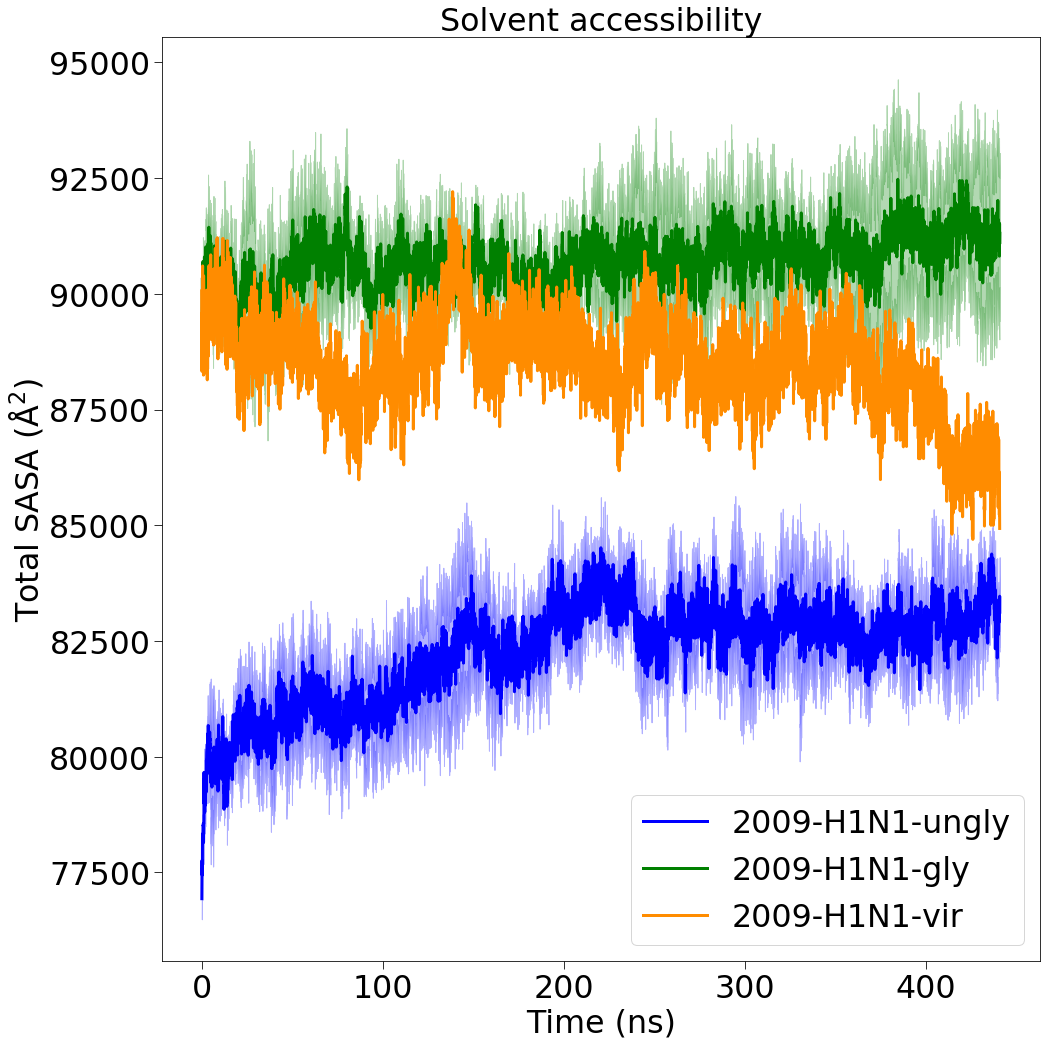

In [88]:
#SASA plot
plt.figure()
x = np.arange(0, 7350)
plt.plot(sasa_unglycosylated_avg, color='blue', linewidth=3)
plt.plot(sasa_glycosylated_avg, color='green', linewidth=3)
plt.plot(sasav, color='darkorange', linewidth=3)
plt.fill_between(x, sasa_unglycosylated_stdplus, sasa_unglycosylated_stdminus, color='blue', alpha=0.3)
plt.fill_between(x, sasa_glycosylated_stdplus, sasa_glycosylated_stdminus, color='green', alpha=0.3)
plt.xlabel('Time (ns)')
plt.ylabel('Total SASA (Å$^{2}$)')
labels = ["0", "100", "200", "300", "400", "500"]
plt.xticks(np.arange(0,7350, step=1667), labels=labels)
plt.legend(['2009-H1N1-ungly', '2009-H1N1-gly', '2009-H1N1-vir'], loc='lower right')
plt.title('Solvent accessibility')
plt.savefig('sasa_combined.png')